# Programmation linéaire en nombres entiers

In [1]:
using LinearAlgebra
using JuMP, Gurobi

Les logiciels commerciaux supportent, le plus souvent très efficacement, la programmation linéaire mixte en nombre entiers. Considérons par exemple le problème ci-dessous.

In [2]:
m = Model(with_optimizer(Gurobi.Optimizer))

# Variables
@variable(m, 0<= x1 <=10)
@variable(m, x2 >=0, Int)
@variable(m, x3, Bin)

# Fonction objectif
@objective(m, Max, x1 + 2x2 + 5x3)

# Contraintes
@constraint(m, constraint1, -x1 +  x2 + 3x3 <= -5)
@constraint(m, constraint2,  x1 + 3x2 - 7x3 <= 10)

# Modèle complet
print(m)

# Résoudre le problème
status = optimize!(m)

println("Optimal Solutions:")
println("x1 = ", value(x1), " x2 = ", value(x2), " x3 = ", value(x3))

Academic license - for non-commercial use only
Max x1 + 2 x2 + 5 x3
Subject to
 constraint1 : -x1 + x2 + 3 x3 <= -5.0
 constraint2 : x1 + 3 x2 - 7 x3 <= 10.0
 x1 >= 0.0
 x2 >= 0.0
 x1 <= 10.0
 x2 integer
 x3 binary
Academic license - for non-commercial use only
Optimize a model with 2 rows, 3 columns and 6 nonzeros
Variable types: 1 continuous, 2 integer (1 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+00]
  Objective range  [1e+00, 5e+00]
  Bounds range     [1e+01, 1e+01]
  RHS range        [5e+00, 1e+01]
Found heuristic solution: objective 19.0000000
Presolve removed 2 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds
Thread count was 1 (of 8 available processors)

Solution count 1: 19 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.900000000000e+01, best bound 1.900000000000e+01, gap 0.0000%
Optimal Solutions:
x1 = 10.0 x2 = 2.0 x3 = 1.0


# Question 2

Soit le problème de programmation linéaire en nombres entiers suivant
\begin{align*}
&\min\ z = -10x_1 -20x_2 \\
&\begin{aligned}
\text{s.a.} &\\
& 5x_1 + 8 x_2 \le 60 ,\\
&x_1 \le 8\\
&x_2 \le 4\\
& x_1,x_2 \ge 0 \text{ et entiers.}
\end{aligned}
\end{align*}

## Solution

In [3]:
using Plots

## Itération 1

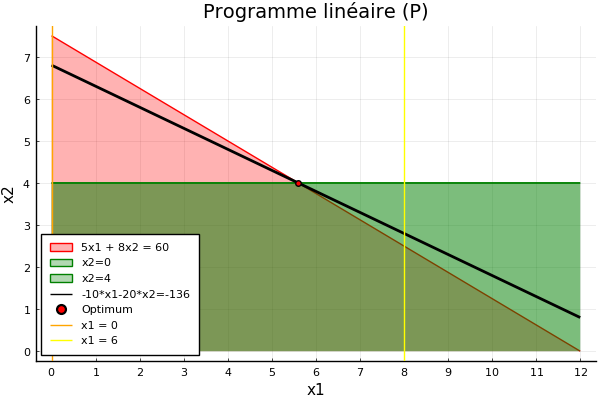

In [4]:
x1=0:0.01:12
g2 = (x1 -> 7-x1/2 ≥ 0 ? 15/2-5/8*x1 : NaN)
g3 = (x1 -> 0 )
g3 = (x1 -> 4 )

objOpt = (x1 -> -1/5*x1+(282.5)/50 ≥ 0 ? -1/2*x1+(136)/20 : NaN)

pyplot()

plot()

plot!(x1,g2,fillrange = 0,
         fillalpha = 0.3,
         fillcolor = :red,
         style=:auto,
         color=:red,
         label="5x1 + 8x2 = 60")
plot!(x1, g3,fillrange = 0,
         fillalpha = 0.3,
         fillcolor = :green,
         color=:green,
         label="x2=0")
plot!(x1, g3,fillrange = 0,
         fillalpha = 0.3,
         fillcolor = :green,
         color=:green,
         label="x2=4")

plot!(x1,objOpt, color=:black, linewidth=2, linestyle=:solid, label="-10*x1-20*x2=-136")


scatter!([5.6],[4],label="Optimum", color=:red)
vline!([0], label="x1 = 0", color=:orange)
vline!([8], label="x1 = 6", color=:yellow)

plot!(                                       
    #size=(800, 600),                                                                             
    xticks = 0:12,   
    yticks = 0:8,                          
                                                  
    ylabel = "x2", 
    xlabel = "x1",                       
    
    legend=:bottomleft,
    title  = "Programme linéaire (P)"                    
    )

Solution : $x_1 = 5.6$; $x_2 = 4$; $\bar{z} = -136$ 

## Itération 2

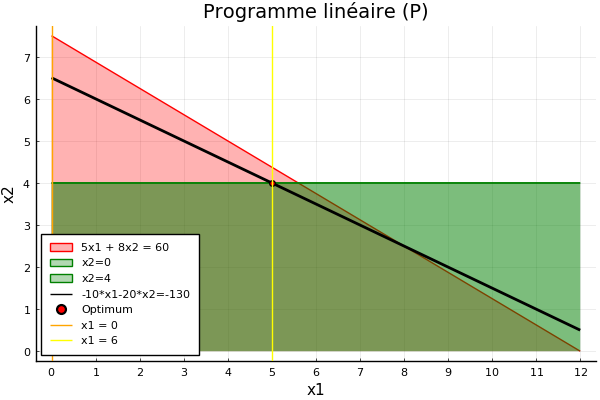

In [5]:
x1=0:0.01:12
g2 = (x1 -> 7-x1/2 ≥ 0 ? 15/2-5/8*x1 : NaN)
g3 = (x1 -> 0 )
g3 = (x1 -> 4 )

objOpt = (x1 -> -1/5*x1+(282.5)/50 ≥ 0 ? -1/2*x1+(130)/20 : NaN)

pyplot()

plot()

plot!(x1,g2,fillrange = 0,
         fillalpha = 0.3,
         fillcolor = :red,
         style=:auto,
         color=:red,
         label="5x1 + 8x2 = 60")
plot!(x1, g3,fillrange = 0,
         fillalpha = 0.3,
         fillcolor = :green,
         color=:green,
         label="x2=0")
plot!(x1, g3,fillrange = 0,
         fillalpha = 0.3,
         fillcolor = :green,
         color=:green,
         label="x2=4")

plot!(x1,objOpt, color=:black, linewidth=2, linestyle=:solid, label="-10*x1-20*x2=-130")


scatter!([5],[4],label="Optimum", color=:red)
vline!([0], label="x1 = 0", color=:orange)
vline!([5], label="x1 = 6", color=:yellow)

plot!(                                       
    #size=(800, 600),                                                                             
    xticks = 0:12,   
    yticks = 0:8,                          
                                                  
    ylabel = "x2", 
    xlabel = "x1",                       
    
    legend=:bottomleft,
    title  = "Programme linéaire (P)"                    
    )

Solution : $x_1 = 5$; $x_2 = 4$; $\bar{z} = -130$

## Itération 3

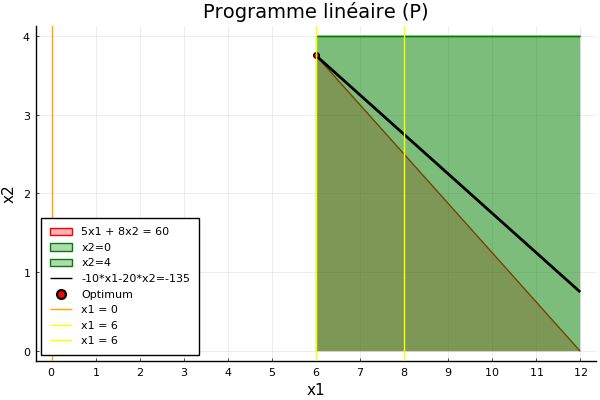

In [6]:
x1=6:0.01:12
g2 = (x1 -> 7-x1/2 ≥ 0 ? 15/2-5/8*x1 : NaN)
g3 = (x1 -> 0 )
g3 = (x1 -> 4 )


objOpt = (x1 -> -1/5*x1+(282.5)/50 ≥ 0 ? -1/2*x1+(135)/20 : NaN)

pyplot()

plot()

plot!(x1,g2,fillrange = 0,
         fillalpha = 0.3,
         fillcolor = :red,
         style=:auto,
         color=:red,
         label="5x1 + 8x2 = 60")
plot!(x1, g3,fillrange = 0,
         fillalpha = 0.3,
         fillcolor = :green,
         color=:green,
         label="x2=0")
plot!(x1, g3,fillrange = 0,
         fillalpha = 0.3,
         fillcolor = :green,
         color=:green,
         label="x2=4")

plot!(x1,objOpt, color=:black, linewidth=2, linestyle=:solid, label="-10*x1-20*x2=-135")


scatter!([6],[3.75],label="Optimum", color=:red)
vline!([0], label="x1 = 0", color=:orange)
vline!([6], label="x1 = 6", color=:yellow)
vline!([8], label="x1 = 6", color=:yellow)

plot!(                                       
    #size=(800, 600),                                                                             
    xticks = 0:12,   
    yticks = 0:8,                          
                                                  
    ylabel = "x2", 
    xlabel = "x1",                       
    
    legend=:bottomleft,
    title  = "Programme linéaire (P)"                    
    )

Solution : $x_1 = 6$; $x_2 = 3,75$; $\bar{z} = -135$

## Itération 4

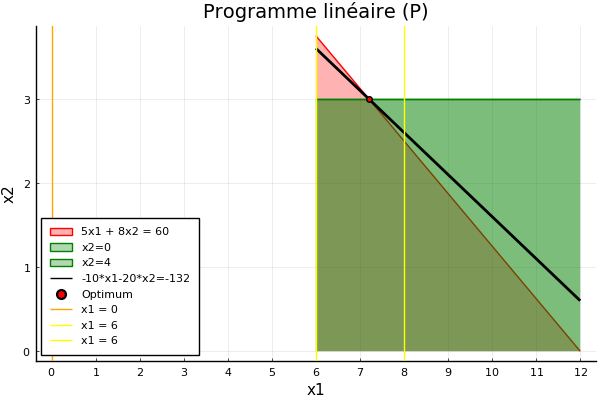

In [7]:
x1=6:0.01:12
g2 = (x1 -> 7-x1/2 ≥ 0 ? 15/2-5/8*x1 : NaN)
g3 = (x1 -> 0 )
g3 = (x1 -> 3 )


objOpt = (x1 -> -1/5*x1+(282.5)/50 ≥ 0 ? -1/2*x1+(132)/20 : NaN)

pyplot()

plot()

plot!(x1,g2,fillrange = 0,
         fillalpha = 0.3,
         fillcolor = :red,
         style=:auto,
         color=:red,
         label="5x1 + 8x2 = 60")
plot!(x1, g3,fillrange = 0,
         fillalpha = 0.3,
         fillcolor = :green,
         color=:green,
         label="x2=0")
plot!(x1, g3,fillrange = 0,
         fillalpha = 0.3,
         fillcolor = :green,
         color=:green,
         label="x2=4")

plot!(x1,objOpt, color=:black, linewidth=2, linestyle=:solid, label="-10*x1-20*x2=-132")


scatter!([7.2],[3],label="Optimum", color=:red)
vline!([0], label="x1 = 0", color=:orange)
vline!([6], label="x1 = 6", color=:yellow)
vline!([8], label="x1 = 6", color=:yellow)

plot!(                                       
    #size=(800, 600),                                                                             
    xticks = 0:12,   
    yticks = 0:8,                          
                                                  
    ylabel = "x2", 
    xlabel = "x1",                       
    
    legend=:bottomleft,
    title  = "Programme linéaire (P)"                    
    )

Solution : $x_1 = 7,2$; $x_2 = 3$; $\bar{z} = -132$

## Itération 5

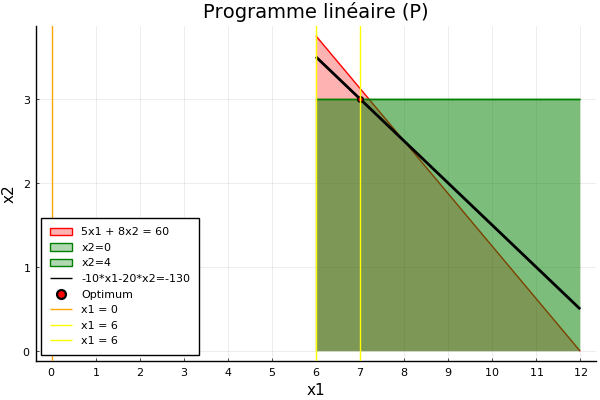

In [8]:
x1=6:0.01:12
g2 = (x1 -> 7-x1/2 ≥ 0 ? 15/2-5/8*x1 : NaN)
g3 = (x1 -> 0 )
g3 = (x1 -> 3 )


objOpt = (x1 -> -1/5*x1+(282.5)/50 ≥ 0 ? -1/2*x1+(130)/20 : NaN)

pyplot()

plot()

plot!(x1,g2,fillrange = 0,
         fillalpha = 0.3,
         fillcolor = :red,
         style=:auto,
         color=:red,
         label="5x1 + 8x2 = 60")
plot!(x1, g3,fillrange = 0,
         fillalpha = 0.3,
         fillcolor = :green,
         color=:green,
         label="x2=0")
plot!(x1, g3,fillrange = 0,
         fillalpha = 0.3,
         fillcolor = :green,
         color=:green,
         label="x2=4")

plot!(x1,objOpt, color=:black, linewidth=2, linestyle=:solid, label="-10*x1-20*x2=-130")


scatter!([7],[3],label="Optimum", color=:red)
vline!([0], label="x1 = 0", color=:orange)
vline!([6], label="x1 = 6", color=:yellow)
vline!([7], label="x1 = 6", color=:yellow)

plot!(                                       
    #size=(800, 600),                                                                             
    xticks = 0:12,   
    yticks = 0:8,                          
                                                  
    ylabel = "x2", 
    xlabel = "x1",                       
    
    legend=:bottomleft,
    title  = "Programme linéaire (P)"                    
    )

Solution : $x_1 = 7$; $x_2 = 3$; $\bar{z} = -130$

## Itération 6

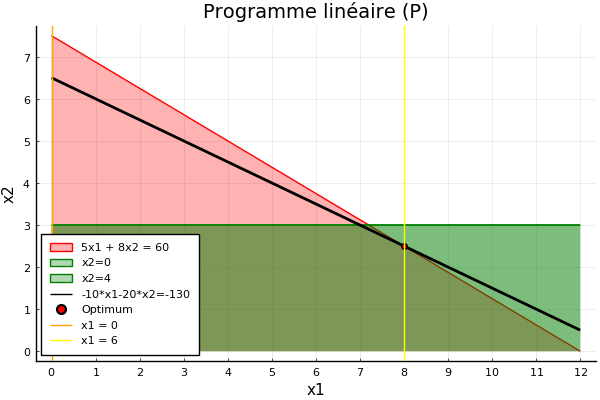

In [9]:
x1=0:0.01:12
g2 = (x1 -> 7-x1/2 ≥ 0 ? 15/2-5/8*x1 : NaN)
g3 = (x1 -> 0 )
g3 = (x1 -> 3 )


objOpt = (x1 -> -1/5*x1+(282.5)/50 ≥ 0 ? -1/2*x1+(130)/20 : NaN)

pyplot()

plot()

plot!(x1,g2,fillrange = 0,
         fillalpha = 0.3,
         fillcolor = :red,
         style=:auto,
         color=:red,
         label="5x1 + 8x2 = 60")
plot!(x1, g3,fillrange = 0,
         fillalpha = 0.3,
         fillcolor = :green,
         color=:green,
         label="x2=0")
plot!(x1, g3,fillrange = 0,
         fillalpha = 0.3,
         fillcolor = :green,
         color=:green,
         label="x2=4")

plot!(x1,objOpt, color=:black, linewidth=2, linestyle=:solid, label="-10*x1-20*x2=-130")


scatter!([8],[2.5],label="Optimum", color=:red)
vline!([0], label="x1 = 0", color=:orange)
vline!([8], label="x1 = 6", color=:yellow)

plot!(                                       
    #size=(800, 600),                                                                             
    xticks = 0:12,   
    yticks = 0:8,                          
                                                  
    ylabel = "x2", 
    xlabel = "x1",                       
    
    legend=:bottomleft,
    title  = "Programme linéaire (P)"                    
    )

Solution : $x_1 = 8$; $x_2 = 2,5$; $\bar{z} = -130$

## Itération 7

Non réalisable

## Question 3

Source: http://web.tecnico.ulisboa.pt/mcasquilho/compute/_linpro/TaylorB_module_c.pdf

Le propriétaire d'un atelier d'usinage prévoit de se développer en achetant de nouvelles machines - des presses et des tours. Le propriétaire a estimé que chaque presse achetée augmenterait les bénéfices de \$100 par jour et que chaque tour augmenterait les bénéfices de \$150 par jour. Le nombre de machines que le propriétaire peut acheter est limité par le coût des machines et l'espace au sol disponible dans le magasin. Les prix d'achat des machines et les espaces requis sont présentés ci-dessous.

| Machine | Espace requis au sol ($pi^2$) | Prix d'achat |
| --- | --- | --- |
| Presse | 15 | \$8.000 |
| Tour | 30 | \$4.000 |

Le propriétaire dispose d'un budget de \$40.000 pour l'achat de machines et de 200 pieds carrés d'espace au sol disponible. Le propriétaire veut savoir combien de chaque type de machine acheter pour maximiser l'augmentation quotidienne des bénéfices.

Travaillons avec la relaxtion linéaire

In [10]:
m = Model(with_optimizer(Gurobi.Optimizer))

# Variables
@variable(m, x1 >= 0) # nombre de presses
@variable(m, x2 >= 0) # nombre de tours

# Fonction objectif
@objective(m, Max, 100x1 + 150x2)  # profit supplémentaire

# Contraintes
@constraint(m, constraint1, 8x1 +  4x2  <= 40)     # budget (en milliers de dollars)
@constraint(m, constraint2,  15x1 + 30x2  <= 200)  # contrainte d'espace

# Modèle complet
print(m)

# Résoudre le problème
status = optimize!(m)

Academic license - for non-commercial use only
Max 100 x1 + 150 x2
Subject to
 constraint1 : 8 x1 + 4 x2 <= 40.0
 constraint2 : 15 x1 + 30 x2 <= 200.0
 x1 >= 0.0
 x2 >= 0.0
Academic license - for non-commercial use only
Optimize a model with 2 rows, 2 columns and 4 nonzeros
Coefficient statistics:
  Matrix range     [4e+00, 3e+01]
  Objective range  [1e+02, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+01, 2e+02]
Presolve time: 0.00s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.7500000e+31   3.125000e+30   8.750000e+01      0s
       2    1.0555556e+03   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.00 seconds
Optimal objective  1.055555556e+03


In [11]:
obj = []

Any[]

In [12]:
function sol_output()
    if (termination_status(m) == MOI.INFEASIBLE)
        println("Problème non réalisable")

        append!(obj, -Inf)
    else
        println("Solution optimale:")
        println("x1 = ", value(x1), " x2 = ", value(x2))
        println("Valeur optimale = ", objective_value(m))
        
        # On va enregistrer les valeurs objectifs trouvées.
        append!(obj, objective_value(m))
    end
end

sol_output (generic function with 1 method)

In [13]:
sol_output()

Solution optimale:
x1 = 2.222222222222222 x2 = 5.555555555555556
Valeur optimale = 1055.5555555555557


1-element Array{Any,1}:
 1055.5555555555557

La solution n'est pas entière.

On va brancher sur la plus grande valeur fractionnaire, ici $x_2$.

In [14]:
@constraint(m, x2left, x2 <= 5)

# Modèle complet
print(m)

# Résoudre le problème
status = optimize!(m)

sol_output()

Max 100 x1 + 150 x2
Subject to
 constraint1 : 8 x1 + 4 x2 <= 40.0
 constraint2 : 15 x1 + 30 x2 <= 200.0
 x2left : x2 <= 5.0
 x1 >= 0.0
 x2 >= 0.0
Optimize a model with 3 rows, 2 columns and 5 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e+02, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+00, 2e+02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0555556e+03   2.222222e+00   0.000000e+00      0s
       1    1.0000000e+03   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds
Optimal objective  1.000000000e+03
Solution optimale:
x1 = 2.5 x2 = 5.0
Valeur optimale = 1000.0


2-element Array{Any,1}:
 1055.5555555555557
 1000.0

In [15]:
delete(m, x2left)
@constraint(m, x2right, x2 >= 6)

# Modèle complet
print(m)

# Résoudre le problème
status = optimize!(m)

sol_output()

Max 100 x1 + 150 x2
Subject to
 x2right : x2 >= 6.0
 constraint1 : 8 x1 + 4 x2 <= 40.0
 constraint2 : 15 x1 + 30 x2 <= 200.0
 x1 >= 0.0
 x2 >= 0.0
Optimize a model with 3 rows, 2 columns and 5 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e+02, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+00, 2e+02]
Presolve removed 3 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
       0    1.0333333e+03   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds
Optimal objective  1.033333333e+03
Solution optimale:
x1 = 1.3333333333333333 x2 = 6.0
Valeur optimale = 1033.3333333333333

3-element Array{Any,1}:
 1055.5555555555557
 1000.0
 1033.3333333333333

In [16]:
using LightGraphs
using GraphPlot

LoadError: ArgumentError: Package LightGraphs not found in current path:
- Run `import Pkg; Pkg.add("LightGraphs")` to install the LightGraphs package.


In [17]:
g = Graph()
add_vertices!(g,3)
add_edge!(g, 1, 2)
add_edge!(g, 1, 3)
gplot(g, nodelabel=obj)

LoadError: UndefVarError: Graph not defined

Pour $x_2 \leq 5$, la borne supérieure sur la fonction objectif est de 1000, mais la solution n'est pas entière.

Pour $x_2 \geq 6$, la borne supérieure sur la fonction objectif est de 1033+1/3, mais la solution n'est pas non plus entière.

Nous allons brancher à partir de la plus grande borne supérieure. Comme la solution optimale du problème relâché est $x_1 = 4/3$ et $x2 = 6.0$, nous devons brancher sur $x_1$.

In [18]:
@constraint(m, x1left, x1 <= 1)

# Modèle complet
print(m)

# Résoudre le problème
status = optimize!(m)

sol_output()

Max 100 x1 + 150 x2
Subject to
 x2right : x2 >= 6.0
 constraint1 : 8 x1 + 4 x2 <= 40.0
 constraint2 : 15 x1 + 30 x2 <= 200.0
 x1left : x1 <= 1.0
 x1 >= 0.0
 x2 >= 0.0
Optimize a model with 4 rows, 2 columns and 6 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e+02, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0333333e+03   6.666667e-01   0.000000e+00      0s
       1    1.0250000e+03   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds
Optimal objective  1.025000000e+03
Solution optimale:
x1 = 1.0 x2 = 6.166666666666667
Valeur optimale = 1025.0


4-element Array{Any,1}:
 1055.5555555555557
 1000.0
 1033.3333333333333
 1025.0

In [19]:
delete(m, x1left)
@constraint(m, x1right, x1 >= 2)

# Modèle complet
print(m)

# Résoudre le problème
status = optimize!(m)

sol_output()

Max 100 x1 + 150 x2
Subject to
 x2right : x2 >= 6.0
 x1right : x1 >= 2.0
 constraint1 : 8 x1 + 4 x2 <= 40.0
 constraint2 : 15 x1 + 30 x2 <= 200.0
 x1 >= 0.0
 x2 >= 0.0
Optimize a model with 4 rows, 2 columns and 6 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e+02, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+02]
Presolve removed 3 rows and 2 columns
Presolve time: 0.00s

Solved in 0 iterations and 0.00 seconds
Infeasible or unbounded model
Solution optimale:

LoadError: Result index of attribute MathOptInterface.VariablePrimal(1) out of bounds. There are currently 0 solution(s) in the model.

En ajoutant la contrainte $x_1 \geq 2$, le problème est non réalisable. Nous ne pouvons donc plus brancher de ce côté. Avec $x_1 \leq 1.0$, la solution n'est toujours pas entière. Nous allons brancher sur $x_2$ qui demeure fractionnaire.

In [20]:
g = Graph()
add_vertices!(g,5)
add_edge!(g, 1, 2)
add_edge!(g, 1, 3)
add_edge!(g, 3, 4)
add_edge!(g, 3, 5)
gplot(g, nodelabel=obj)

LoadError: UndefVarError: Graph not defined

Branchons sur $x_2$.

In [21]:
delete(m, x1right)
@constraint(m, x1left1, x1 <= 1)
@constraint(m, x2left6, x2 <= 6)

# Modèle complet
print(m)

# Résoudre le problème
status = optimize!(m)

sol_output()

Max 100 x1 + 150 x2
Subject to
 x2right : x2 >= 6.0
 constraint1 : 8 x1 + 4 x2 <= 40.0
 constraint2 : 15 x1 + 30 x2 <= 200.0
 x1left1 : x1 <= 1.0
 x2left6 : x2 <= 6.0
 x1 >= 0.0
 x2 >= 0.0
Optimize a model with 5 rows, 2 columns and 7 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e+02, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+02]
Presolve removed 5 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
       0    1.0000000e+03   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds
Optimal objective  1.000000000e+03
Solution optimale:
x1 = 1.0 x2 = 6.0
Valeur optimale = 1000.0


5-element Array{Any,1}:
 1055.5555555555557
 1000.0
 1033.3333333333333
 1025.0
 1000.0

La solution est à présent entière, aussi nous obtenons une borne inférieure sur la valeur optimale, et nous élaguons le noeud comme nous ne pouvons plus brancher dessus.

L'autre branche consiste à examiner le cas où $x_2 \geq 7$.

In [22]:
delete(m, x2left6)
@constraint(m, x2right7, x2 >= 7)

# Modèle complet
print(m)

# Résoudre le problème
status = optimize!(m)

sol_output()

Max 100 x1 + 150 x2
Subject to
 x2right : x2 >= 6.0
 x2right7 : x2 >= 7.0
 constraint1 : 8 x1 + 4 x2 <= 40.0
 constraint2 : 15 x1 + 30 x2 <= 200.0
 x1left1 : x1 <= 1.0
 x1 >= 0.0
 x2 >= 0.0
Optimize a model with 5 rows, 2 columns and 7 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e+02, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+02]
Presolve removed 3 rows and 0 columns
Presolve time: 0.00s

Solved in 0 iterations and 0.00 seconds
Infeasible or unbounded model
Solution optimale:

LoadError: Result index of attribute MathOptInterface.VariablePrimal(1) out of bounds. There are currently 0 solution(s) in the model.

Le problème est non-réalisable. Nous pouvons élaguer le noeud.

In [23]:
g = Graph()
add_vertices!(g,7)
add_edge!(g, 1, 2)
add_edge!(g, 1, 3)
add_edge!(g, 3, 4)
add_edge!(g, 3, 5)
add_edge!(g, 4, 6)
add_edge!(g, 4, 7)
gplot(g, nodelabel=obj)

LoadError: UndefVarError: Graph not defined

Nous 

Retournons au noeud non élagué avec $x_2 \leq 5$. Dans ce cas la borne supérieure sur la fonction objectif est de 1000, qui est la valeur trouvée précédemment avec la solution entière $x_1 = 1$, $x_2 = 6$. Nous ne pouvons donc pas améliorer l'objectif en explorant le cas $x_2 <= 5$ et nous élaguons le noeud correspondant. Comme il n'y a plus de noeud non élagué, nous nous arrêtons avec la solution optimale $x_1 = 1$, $x_2 = 6$.